In [1]:
# import the libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [54]:
# load the data
df = pd.read_csv(r'~\sms_spam.csv', encoding='latin-1')
# dropping unecessary columns
df = df.drop('Unnamed: 2', 1)
df = df.drop('Unnamed: 3', 1)
df = df.drop('Unnamed: 4', 1)
df = df.rename(columns={'v1': 'spam',
    'v2': 'sms'})

In [3]:
# looking at the data and checking its format 
df.head()

,spam,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# looking for missing values
nans = df.shape[0] - df.dropna().shape[0]
print('{} rows have missing values'.format(nans))

0 rows have missing values


In [5]:
# counting the classes spam and ham
print('spam count ' +str(len(df.loc[df['spam']=='spam'])))
print('not spam count ' +str(len(df.loc[df.spam=='ham'])))   
print(df.shape)

spam count 747
not spam count 4825
(5572, 2)


# WordCloud

In [6]:
# exploring an example of the dataset to practice with
SMS2 = df.iloc[2,1]
SMS2

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

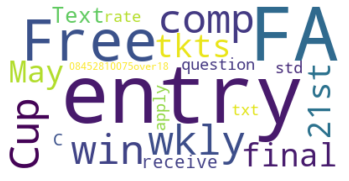

In [7]:
# using wordcloud to check which words are repeated mostly in this dataset without removing the stopwords
stopwords = set(STOPWORDS)
wordcloud1 = WordCloud(background_color="white").generate(SMS2)
plt.figure() 
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

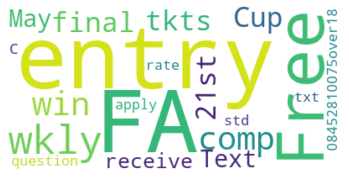

In [8]:
# using wordcloud to check which words are repeated mostly in this dataset after removing the stopwords
wordcloud2 = WordCloud(stopwords = STOPWORDS,background_color="white").generate(SMS2)
plt.figure() 
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

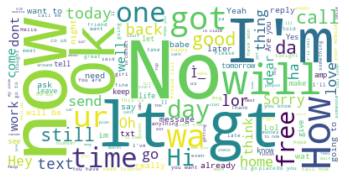

In [9]:
# joining all the texts to explore what are the most redundant words
SMS = " ".join(msg for msg in df.sms)
wordcloud = WordCloud(stopwords = STOPWORDS, background_color="white").generate(SMS)
plt.figure() 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
# splitting the data to two dataframes the ham and the spam data
df_spam = df.loc[df.spam == 'spam']
df_ham = df.loc[df.spam == 'ham']


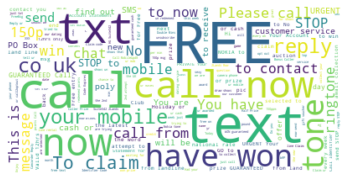

In [11]:
# getting the wordcloud from the spam dataframe
spam_text = " ".join(msg for msg in df_spam.sms)
wordcloud = WordCloud(stopwords = stopwords, background_color="white").generate(spam_text)
plt.figure() 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

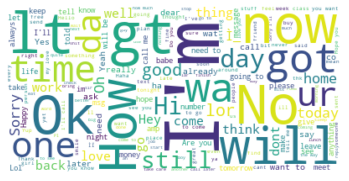

In [12]:
# getting the wordcloud from the ham dataframe
ham_text = " ".join(msg for msg in df_ham.sms)
wordcloud = WordCloud(stopwords = stopwords, background_color="white").generate(ham_text)
plt.figure() 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Spam Detection

In [53]:
# let's start the spam detection process
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [55]:
# data description
df.describe()

,spam,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [56]:
# spam description
df.groupby('spam').describe()

sms                                                               
     count unique                                                top freq
spam                                                                     
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

In [57]:
# convert label to a numerical variable
le = preprocessing.LabelEncoder()
df['labels'] = le.fit_transform(df.spam)
df.head(5)

,spam,sms,labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [30]:
df.head(5)
#df = df.drop('spam', 1)

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
dtype: object

In [58]:
# create a new variable for the length of the sms
df['sms_len'] = df.sms.apply(len)
df.head()

,spam,sms,labels,sms_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


Text(0.5, 0, 'SMS Length')

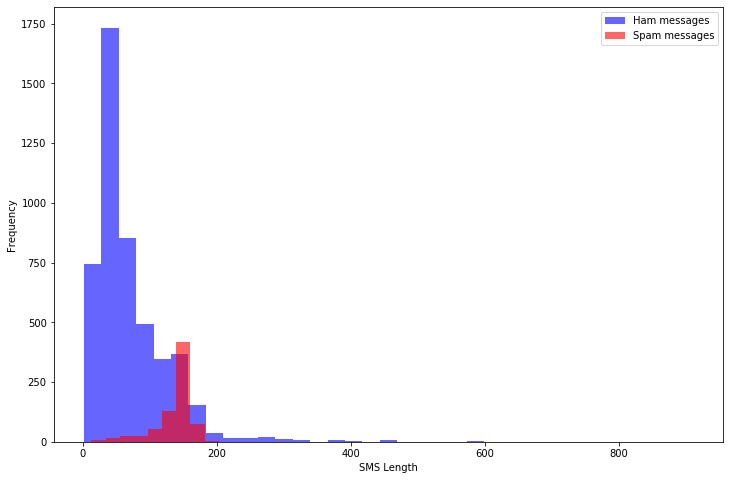

In [60]:
# plot the histograms corresponding to the length of the texts to check for the characteristics of each type of texts
plt.figure(figsize=(12, 8))

df[df.spam=='ham'].sms_len.plot(bins=35, kind='hist', color='blue', 
                                       label='Ham messages', alpha=0.6)
df[df.spam=='spam'].sms_len.plot(kind='hist', color='red', 
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("SMS Length")

## Very interesting! Through just basic EDA we've been able to discover a trend that spam messages tend to have more characters.

In [61]:
# more statistical infos about the ham data
df[df.spam=='ham'].describe()

,labels,sms_len
count,4825.0,4825.000000
mean,0.0,71.023627
std,0.0,58.016023
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,92.000000
max,0.0,910.000000


In [62]:
# more statistical infos about the spam data
df[df.spam=='spam'].describe()

,labels,sms_len
count,747.0,747.000000
mean,1.0,138.866131
std,0.0,29.183082
min,1.0,13.000000
25%,1.0,132.500000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,224.000000


In [65]:
# check an sms with a length equal to 910 characters
df[df.sms_len==910].sms.iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

## Text preprocessing

In [71]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sarah\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [72]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [73]:
df.head()

,spam,sms,labels,sms_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [74]:
df['clean_sms'] = df.sms.apply(text_process)

In [75]:
df.head()

,spam,sms,labels,sms_len,clean_sms
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry wkly comp win FA Cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah think goes usf lives around though


In [76]:
type(stopwords.words('english'))

list

In [78]:
from collections import Counter

words = df[df.spam=='ham'].clean_sms.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for w in words:
    ham_words.update(w)
    
print(ham_words.most_common(50))

[('get', 303), ('ltgt', 276), ('ok', 272), ('go', 247), ('ill', 236), ('know', 232), ('got', 231), ('like', 229), ('call', 229), ('come', 224), ('good', 222), ('time', 189), ('day', 187), ('love', 185), ('going', 167), ('want', 163), ('one', 162), ('home', 160), ('lor', 160), ('need', 156), ('sorry', 153), ('still', 146), ('see', 137), ('n', 134), ('later', 134), ('da', 131), ('r', 131), ('back', 129), ('think', 128), ('well', 126), ('today', 125), ('send', 123), ('tell', 121), ('cant', 118), ('ì', 117), ('hi', 117), ('take', 112), ('much', 112), ('oh', 111), ('night', 107), ('hey', 106), ('happy', 105), ('great', 100), ('way', 100), ('hope', 99), ('pls', 98), ('work', 96), ('wat', 95), ('thats', 94), ('dear', 94)]


In [81]:
words = df[df.spam=='spam'].clean_sms.apply(lambda x: [word.lower() for word in x.split()])
spam_words = Counter()

for w in words:
    spam_words.update(w)
    
print(spam_words.most_common(50))

[('call', 347), ('free', 216), ('txt', 150), ('mobile', 123), ('text', 120), ('claim', 113), ('stop', 113), ('reply', 101), ('prize', 92), ('get', 83), ('new', 69), ('send', 67), ('nokia', 65), ('urgent', 63), ('cash', 62), ('win', 60), ('contact', 56), ('service', 55), ('please', 52), ('guaranteed', 50), ('customer', 49), ('16', 49), ('week', 49), ('tone', 48), ('per', 46), ('phone', 45), ('18', 43), ('chat', 42), ('awarded', 38), ('draw', 38), ('latest', 36), ('å£1000', 35), ('line', 35), ('150ppm', 34), ('mins', 34), ('receive', 33), ('camera', 33), ('1', 33), ('every', 33), ('message', 32), ('holiday', 32), ('landline', 32), ('shows', 31), ('å£2000', 31), ('go', 31), ('box', 30), ('number', 30), ('apply', 29), ('code', 29), ('live', 29)]
